In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix

plt.rc('font', size=20)

pd.set_option('display.max_columns', None)

# Read data From File

In [412]:
covid_df = pd.read_excel("corona value - 08-04-99.xlsx")
covid_df.columns = covid_df.iloc[1]
covid_df = covid_df.drop(covid_df.index[[0,1,2,3,4]]).reset_index().drop('index', axis=1)

# Drop NaN Rows

In [413]:
covid_df = covid_df.dropna()
display(covid_df)
display(covid_df.describe())

1    Age (yr)  Gender pulse rate respiratory rate Tempreture Height Weight  \
0          73    male         64               22       36.6    155     60   
1          29  female         80               22       37.1    165     67   
4          34  female        102               22       37.2    170     53   
5          19    male        124               20       36.9    170     65   
6          13  female         89               18       36.3    155     54   
...       ...     ...        ...              ...        ...    ...    ...   
3474       52  female        120               19         36    173     85   
3475       75  female         92               18         37    160     50   
3477       39  female        125               23         37    162    106   
3478       56    male        150               24         35    168     65   
3479       68  female         75               26       36.2    150     72   

1       BMI Systolic blood presure Diastolic blood pressure sPO2%  \
0     24.97                    136                       41    98   
1     24.61                     94                       44    97   
4     18.34                    114                       47    96   
5     22.49                    123                       50    98   
6     22.48                    115                       51    96   
...     ...                    ...                      ...   ...   
3474   28.4                    156                      110    97   
3475  19.53                    183                      117    92   
3477  40.39                    185                      125    90   
3478  23.03                    231                      148    90   
3479     32                    185                      152    94   

1    Respratory distress Triage result Duration of starting complaints fever  \
0                      0             1                               1     0   
1                      0             1                               1     0   
4                      0             1                               1     1   
5                      0             1                               4     0   
6                      1             1                               1     1   
...                  ...           ...                             ...   ...   
3474                   0             3                               2     1   
3475                   0             3                               1     0   
3477                   0             3                               1     0   
3478                   0             3                               1     0   
3479                   1             3                               2     0   

1    chill cough sputum dyspnea chest pain body pain myalgia arthralgia  \
0        0     0      0       0          1         0       0          0   
1        1     1      0       0          0         0       1          0   
4        0     0      0       0          0         1       1          1   
5        0     1      0       1          0         0       0          0   
6        1     0      1       1          1         1       1          0   
...    ...   ...    ...     ...        ...       ...     ...        ...   
3474     1     1      1       1          1         0       0          0   
3475     0     1      0       0          0         1       1          0   
3477     0     1      0       1          1         1       0          0   
3478     0     1      1       0          0         0       0          0   
3479     1     1      0       1          0         0       0          0   

1    fatigue weakness sweating sore throat throat dryness headache  \
0          0        0        0           0              0        0   
1          0        1        0           1              0        0   
4          0        0        0           0              0        0   
5          0        1        0           0              0        1   
6          0        0 

1       Age (yr) Gender  pulse rate  respiratory rate  Tempreture  Height  \
count       2577   2577        2577              2577      2577.0    2577   
unique        83      2          99                22        48.0      55   
top           34   male         100                20        36.5     170   
freq          98   1418         128              1079       279.0     318   

1       Weight      BMI  Systolic blood presure  Diastolic blood pressure  \
count     2577  2577.00                    2577                      2577   
unique      91   825.00                     117                        90   
top         80    27.68                     120                        80   
freq       209    54.00                      96                       114   

1       sPO2%  Respratory distress  Triage result  \
count    2577                 2577           2577   
unique     20                    2              3   
top        96                    0              2   
freq      627                 2282           1302   

1       Duration of starting complaints  fever  chill  cough  sputum  dyspnea  \
count                              2577   2577   2577   2577    2577     2577   
unique                                4      2      2      2       2        2   
top                                   1      0      0      1       0        0   
freq                               1333   1848   1837   1297    2284     1629   

1       chest pain  body pain  myalgia  arthralgia  fatigue  weakness  \
count         2577       2577     2577        2577     2577      2577   
unique           2          2        2           2        1         2   
top              0          0        0           0        0         0   
freq          2002       1715     1996        2420     2577      1931   

1       sweating  sore throat  throat dryness  headache  nose stiffness  \
count       2577         2577            2577      2577            2577   
unique         2            2               2         2               2   
top            0            0               0         0               0   
freq        2313         2082            2326      2031            2376   

1       Laryngitis  anosmia  dysgeusia  epistaxia  conjectivitis  anorexia  \
count         2577     2577       2577       2577           2577      2577   
unique           2        2          2          2              2         2   
top              0        0          0          0              0         0   
freq          2504     2281       2380       2572           2526      2169   

1       nausea/vomiting  diarrhea  abd pain  severe abd pain  bloody diarrhea  \
count              2577      2577      2577             2577             2577   
unique                2         2         2                2                2   
top                   0         0         0                0                0   
freq               2143      2209      2347             2568             2568   

1       dysuria  ear pain  skin infection  cyanosis  decrease of consiousness  \
count      2577      2577            2577      2577                      2577   
unique        2         2               2         2                         2   
top           0         0               0         0                         0   
freq       2539      2520            2569      2573                      2570   

1       seizure  dowsiness  amnesia  without compalint  \
count      2577       2577     2577               2577   
unique        2          2        2                  1   
top           0          0        0                  0   
freq       2576       2515     2476               2577   

1       prolonged fever/dyspnea/cough  prolonged anorexia/nausea/vomiting  \
count                            2577                                2577   
unique                              2                                   2   
top                                 0                                   0   
freq        

# Plot Columns for Visioalization

for column in covid_df.columns:
    column_count = Counter(list(covid_df[column].values))
    x, y = zip(*column_count.most_common(15))
    plt.figure()
    plt.barh(x, y)
    for i, val in enumerate(y):
        plt.annotate(val, (y[i], x[i]), color='b')
        plt.gca().invert_yaxis()
        plt.title(column)
        plt.ylabel('values')
        plt.xlabel('count')
        plt.grid(False, axis='y')
        plt.show()
        break

# Features heatmap

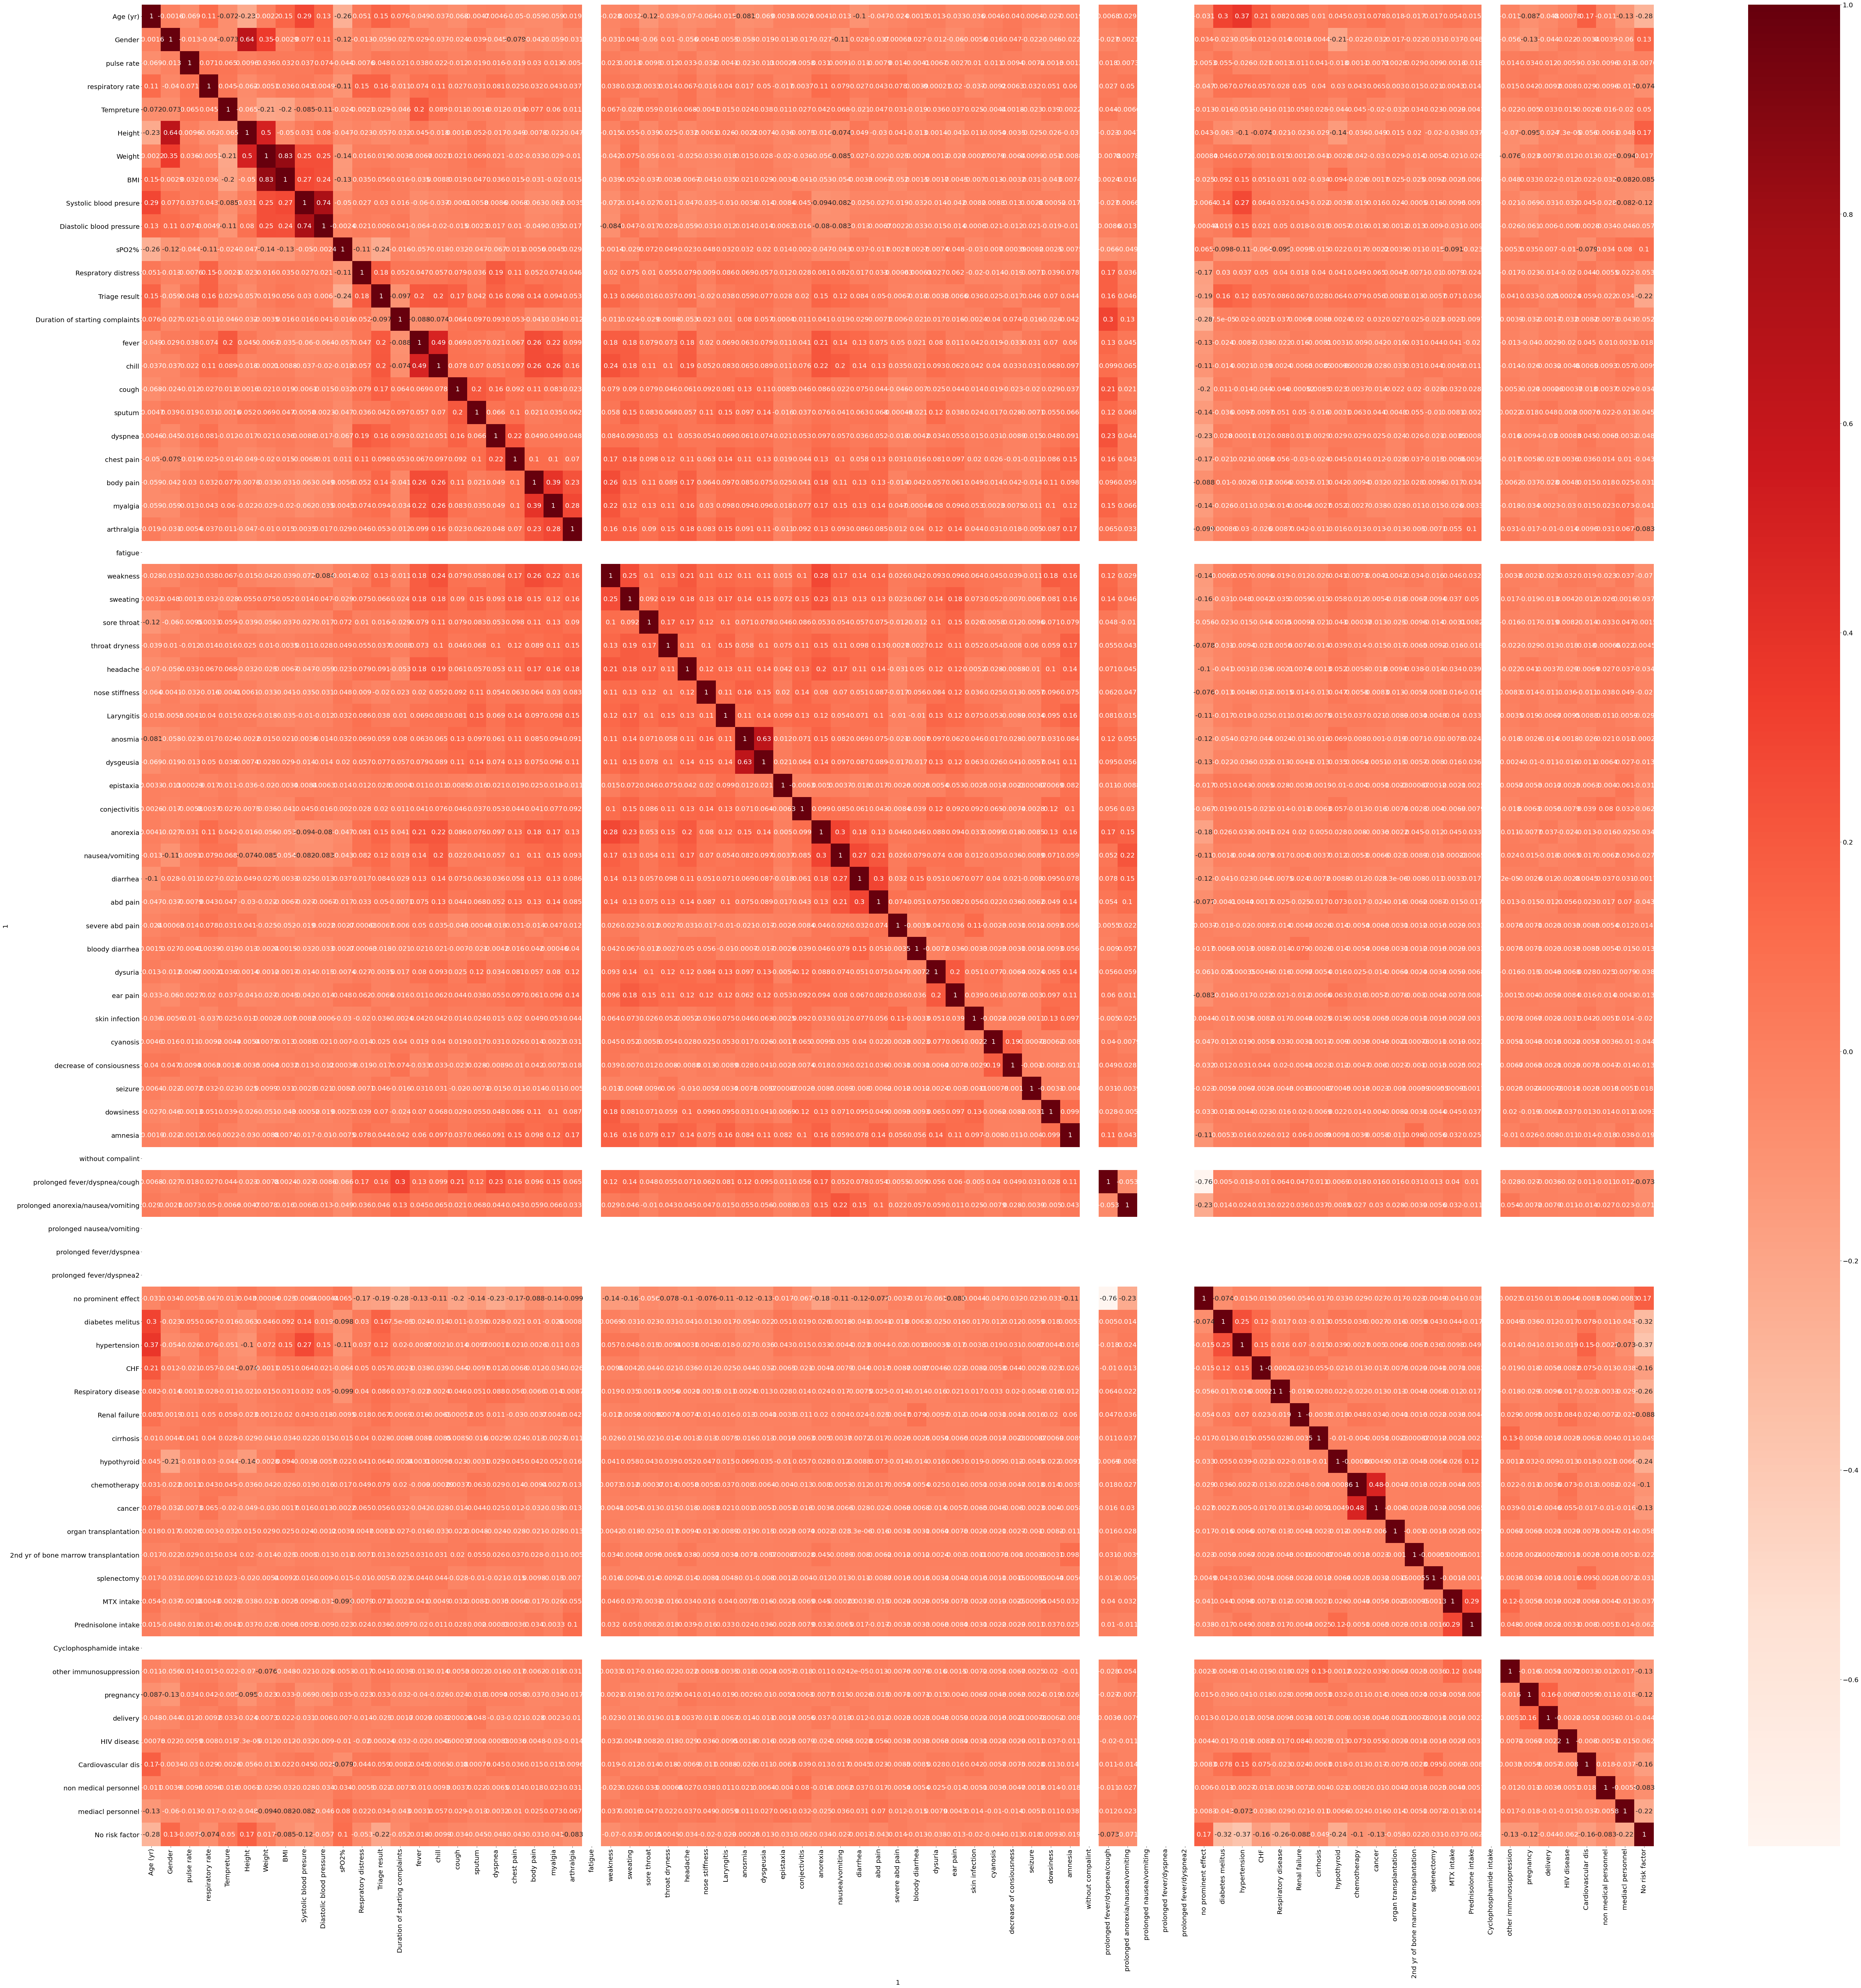

In [426]:
import seaborn as sns
plt.figure(figsize=(102,102))
cor = covid_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Chose most impoertant features

temp = [i for i in features.index]
temp.append('Triage result')
display(temp)
covid_df = covid_df.loc[:, temp]

# Convert to Numeric float values

In [415]:
cols=[i for i in covid_df.columns if i not in ["Gender"]]
covid_df['Triage result'] = covid_df['Triage result'].astype(str)
for col in cols:
    covid_df[col]=pd.to_numeric(covid_df[col])
    covid_df[col]=covid_df[col].astype(np.float64)
display(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 3479
Columns: 102 entries, Age (yr) to No previous treatment
dtypes: float64(101), object(1)
memory usage: 2.0+ MB


None

# Covid features Correlation

In [416]:
# display(covid_df)
covid_df[covid_df.columns].corr()['Triage result'][:]

1
Age (yr)                 0.151446
pulse rate               0.047508
respiratory rate         0.158070
Tempreture               0.028854
Height                  -0.057116
                           ...   
symptomatic therapy      0.025422
AZT                      0.026964
OST                      0.018199
admission                0.007566
No previous treatment   -0.015981
Name: Triage result, Length: 101, dtype: float64

# Covert String Gender to Label

In [417]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
covid_df['Gender']= label_encoder.fit_transform(covid_df['Gender']) 
covid_df['Gender'] = covid_df['Gender'].astype(np.float64)

# Delete Imprecise Columns

In [418]:
covid_df = covid_df.drop(covid_df.loc[:,'Lymp<1100':].columns, axis=1)

# Apply Cutoff For Being Sick    # Not Useful

def apply_cutoff(x, cut_off, compare):
    if compare == "higher":
        if x >= cut_off:
            return 1
        else:
            return 0
    else:
        if x <= cut_off:
            return 1
        else:
            return 0
    

covid_df['Systolic blood presure'] = covid_df['Systolic blood presure'].apply(lambda x : apply_cutoff(x, 140, "higher"))
covid_df['Diastolic blood pressure'] = covid_df['Diastolic blood pressure'].apply(lambda x : apply_cutoff(x, 90, "higher"))
covid_df['sPO2%'] = covid_df['sPO2%'].apply(lambda x : apply_cutoff(x, 95, "lower"))

# Drop Columns with x10 different  # Not Useful

for column in covid_df.columns:
    column_count = Counter(list(covid_df[column].values))
    x, y = zip(*column_count.most_common(15))
    if (len(y) == 2 and (y[0] >= 10 * y[1] or y[1] >= 10 * y[0])) or len(y) == 1:
        covid_df = covid_df.drop(column, axis=1)


# Check if we have only 2 Class  # Not Useful

covid_df['Triage result'] = covid_df['Triage result'].apply(lambda x: x if x == 1 else 2)
display(Counter(covid_df['Triage result']))

# Seperating Target and Train 

In [419]:
target = covid_df['Triage result']
train = covid_df.drop('Triage result', axis=1)

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, stratify=target, random_state=14)

print("Test: Number of each Class: " , sorted(Counter(y_test).items()), " Number of Samples: " ,len(x_test))
print("Train: Number of each Class: " , sorted(Counter(y_train).items()), " Number of Samples: " ,len(x_train))

Test: Number of each Class:  [(1.0, 225), (2.0, 261), (3.0, 30)]  Number of Samples:  516
Train: Number of each Class:  [(1.0, 899), (2.0, 1041), (3.0, 121)]  Number of Samples:  2061


# Fit function

In [420]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

def fit(x_train, y_train, x_test, y_test, show_output=False):
        regr = RandomForestClassifier(n_estimators=50, max_features=5)
#         regr = VotingClassifier([('knn', KNeighborsClassifier()), ('GN', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=50, max_features=5))], voting='hard')
        regr.fit(x_train, y_train)
        y_predict_test = regr.predict(x_test)
        y_predict_train = regr.predict(x_train)
        target_names = ['class 1', 'class 2', 'class 3']
        if show_output:
            df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_test})
            print(df)

        print("########### Test Error  ###########")
        accuracy = regr.score(x_test, y_test)
        print('Accuracy is : ', accuracy * 100, '%')
        print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict_test))
        print('Mean Squared Error:', mean_squared_error(y_test, y_predict_test))
        print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict_test)))
        scores = cross_val_score(regr, x_test, y_test, cv=5)
        print('Cross Score is: ', scores.mean())
        print(classification_report(y_test, y_predict_test, target_names=target_names))
        plot_confusion_matrix(regr, x_test, y_test)
        plt.show()

        
        print("########### Train Error ###########")
        accuracy = regr.score(x_train, y_train)
        print('Accuracy is : ', accuracy * 100, '%')
        print('Mean Absolute Error:', mean_absolute_error(y_train, y_predict_train))
        print('Mean Squared Error:', mean_squared_error(y_train, y_predict_train))
        print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_predict_train)))
        scores = cross_val_score(regr, x_test, y_test, cv=5)
        print('Cross Score is: ', scores.mean())
        print(classification_report(y_train, y_predict_train, target_names=target_names))
        plot_confusion_matrix(regr, x_train, y_train)
        plt.show()
        
        
        print(regr.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
        #plot graph of feature importances for better visualization
        feat_importances = pd.Series(regr.feature_importances_, index=x_train.columns)
        feat_importances.nlargest(15).plot(kind='barh')
        plt.show()
        
        return feat_importances.index

# Scale Features

columns_name = x_train.columns
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=columns_name)
display(x_train.describe())

# Over Sampling with Different Algorithms

# # Over Sampler

In [421]:
ros = RandomOverSampler(random_state=0)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
print(sorted(Counter(y_train_ros).items()))

[(1.0, 1041), (2.0, 1041), (3.0, 1041)]


# # Smote # Not UseFul

x_train_smote, y_train_smote = SMOTE().fit_resample(x_train, y_train)
print(sorted(Counter(y_train_smote).items()))

# # Adasyn # Not UseFul

x_train_adasyn, y_train_adasyn = ADASYN(sampling_strategy='minority').fit_resample(x_train, y_train)
print(sorted(Counter(y_train_adasyn).items()))

# Display Train And Target Values

In [422]:
display(x_train_ros)
display(y_train_ros)

1     Age (yr)  Gender  pulse rate  respiratory rate  Tempreture  Height  \
0         49.0     1.0       115.0              24.0        36.5   173.0   
1         39.0     1.0        70.0              20.0        36.0   178.0   
2         47.0     0.0       117.0              20.0        37.8   155.0   
3         64.0     1.0        92.0              18.0        35.5   170.0   
4         29.0     0.0        78.0              20.0        37.0   170.0   
...        ...     ...         ...               ...         ...     ...   
3118      33.0     1.0       117.0              20.0        37.6   178.0   
3119      39.0     0.0       118.0              22.0        37.8   165.0   
3120      64.0     1.0        90.0              24.0        38.1   175.0   
3121      67.0     1.0       114.0              21.0        36.8   178.0   
3122      43.0     1.0       105.0              20.0        35.7   175.0   

1     Weight    BMI  Systolic blood presure  Diastolic blood pressure  sPO2%  \
0       95.0  31.74                   123.0                      93.0   96.0   
1       80.0  25.25                   127.0                      89.0   95.0   
2       85.0  35.38                   144.0                      86.0   95.0   
3       99.0  34.26                   123.0                      88.0   97.0   
4       67.0  23.18                   110.0                      74.0   99.0   
...      ...    ...                     ...                       ...    ...   
3118    78.0  24.62                   154.0                      98.0   95.0   
3119    84.0  30.85                   129.0                      88.0   95.0   
3120    69.0  22.53                   108.0                      63.0   94.0   
3121    95.0  29.98                   129.0                      74.0   83.0   
3122    98.0  32.00                   134.0                      96.0   95.0   

1     Respratory distress  Duration of starting complaints  fever  chill  \
0                     0.0                              1.0    0.0    0.0   
1                     0.0                              1.0    0.0    0.0   
2                     0.0                              2.0    1.0    0.0   
3                     0.0                              2.0    0.0    0.0   
4                     0.0                              1.0    0.0    0.0   
...                   ...                              ...    ...    ...   
3118                  0.0                              2.0    1.0    1.0   
3119                  0.0                              1.0    1.0    1.0   
3120                  0.0                              1.0    1.0    1.0   
3121                  0.0                              3.0    0.0    0.0   
3122                  0.0                              3.0    0.0    1.0   

1     cough  sputum  dyspnea  chest pain  body pain  myalgia  arthralgia  \
0       1.0     0.0      1.0         0.0        0.0      0.0         0.0   
1       0.0     0.0      0.0         0.0        0.0      0.0         0.0   
2       1.0     1.0      1.0         1.0        0.0      0.0         0.0   
3       0.0     0.0      0.0         0.0        0.0      0.0         0.0   
4       0.0     1.0      0.0         0.0        0.0      0.0         0.0   
...     ...     ...      ...         ...        ...      ...         ...   
3118    1.0     0.0      1.0         0.0        0.0      0.0         0.0   
3119    0.0     0.0      1.0         0.0        1.0      1.0         0.0   
3120    0.0     0.0      1.0         0.0        0.0      0.0         0.0   
3121    0.0     0.0      1.0         0.0        0.0      0.0         0.0   
3122    0.0     1.0      1.0         1.0        0.0      0.0         0.0   

1     fatigue  weakness  sweating  sore throat  throat dryness  headache  \
0         0.0       1.0       0.0          0.0             0.0       0.0   
1         0.0       0.0       0.0          0.0             0.0       0.0   
2         0.0       0.0       1.0          0.0             0.0       0.0

0       2.0
1       1.0
2       2.0
3       1.0
4       1.0
       ... 
3118    3.0
3119    3.0
3120    3.0
3121    3.0
3122    3.0
Name: Triage result, Length: 3123, dtype: float64

# Final Results

########### Test Error  ###########
Accuracy is :  62.4031007751938 %
Mean Absolute Error: 0.37790697674418605
Mean Squared Error: 0.3817829457364341
Root Mean Squared Error: 0.6178858678885883
Cross Score is:  0.6064973861090366
              precision    recall  f1-score   support

     class 1       0.62      0.60      0.61       225
     class 2       0.62      0.69      0.65       261
     class 3       1.00      0.23      0.38        30

    accuracy                           0.62       516
   macro avg       0.75      0.51      0.55       516
weighted avg       0.64      0.62      0.62       516



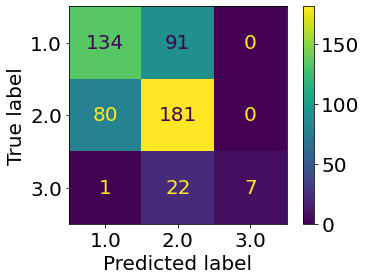

########### Train Error ###########
Accuracy is :  100.0 %
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Cross Score is:  0.5910941000746825
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1041
     class 2       1.00      1.00      1.00      1041
     class 3       1.00      1.00      1.00      1041

    accuracy                           1.00      3123
   macro avg       1.00      1.00      1.00      3123
weighted avg       1.00      1.00      1.00      3123



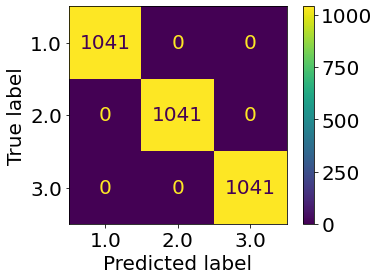

[7.32997723e-02 1.27062790e-02 5.49765997e-02 3.83020686e-02
 4.79733705e-02 5.05907182e-02 5.26000192e-02 5.72081248e-02
 5.56389760e-02 5.44217156e-02 8.64118456e-02 1.96975678e-02
 2.44439907e-02 1.97168316e-02 1.62000994e-02 1.60920877e-02
 8.90168455e-03 2.56805750e-02 1.13716681e-02 1.64557831e-02
 1.11091419e-02 4.71339575e-03 0.00000000e+00 1.39684592e-02
 7.01690194e-03 1.05932860e-02 6.91193104e-03 1.09988346e-02
 6.78082828e-03 2.79274133e-03 6.88316578e-03 5.11998853e-03
 1.70930601e-04 1.87753740e-03 1.14500403e-02 1.23194068e-02
 9.59990992e-03 6.14382136e-03 7.42692753e-04 3.65003327e-04
 1.57576672e-03 1.79987332e-03 6.79387991e-04 8.94896860e-05
 4.54319739e-04 8.33369711e-04 2.09326613e-03 3.44753490e-03
 0.00000000e+00 1.45914262e-02 4.38269099e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.79097817e-02 1.10707084e-02
 1.10876536e-02 2.55932173e-03 6.45532428e-03 2.90950271e-03
 3.69748358e-04 4.98620043e-03 1.33081083e-03 2.02233376e-03
 4.46142891e-04 4.227556

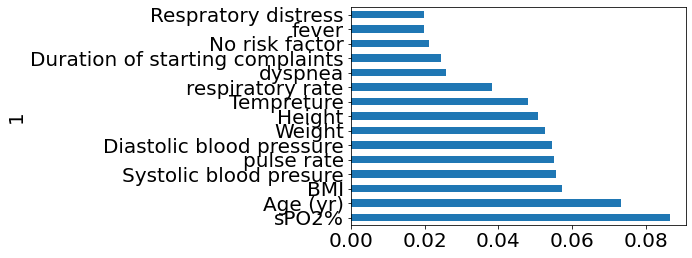

In [425]:
features = fit(x_train_ros, y_train_ros, x_test, y_test)